## Preambule

In [2]:
import numpy as np
from tqdm import tqdm
from importlib import reload
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import scipy
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
os.chdir('K:/Code/effort-sharing/')

## Test

In [3]:
xr_dataread_old = xr.open_dataset("K:/Data/Data_effortsharing/DataUpdate_25032025/startyear_2021/xr_dataread.nc").load()
xr_dataread_new = xr.open_dataset("K:/Data/Data_effortsharing/DataUpdate_ongoing/startyear_2021/xr_dataread.nc").load()

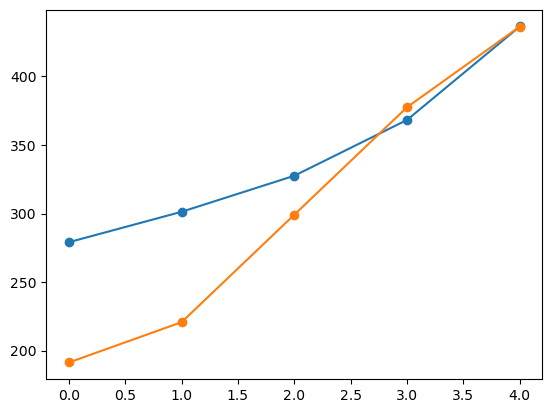

In [3]:
plt.plot(xr_dataread_new.Budget.sel(Temperature=1.5, Risk=0.5), '-o')
plt.plot(xr_dataread_old.Budget.sel(Temperature=1.5, Risk=0.5), '-o')

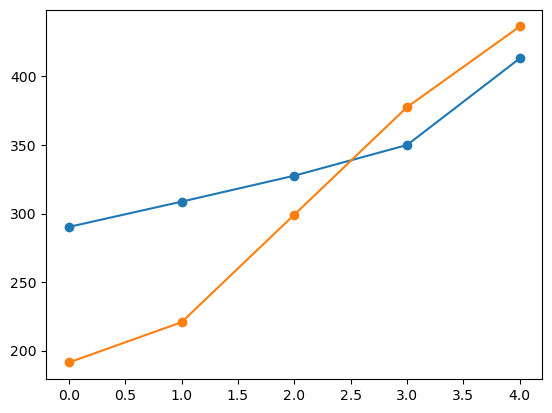

In [3]:
plt.plot(xr_dataread_new.Budget.sel(Temperature=1.5, Risk=0.5), '-o')
plt.plot(xr_dataread_old.Budget.sel(Temperature=1.5, Risk=0.5), '-o')

In [4]:
T = 1.7
np.round(xr_dataread_new.Budget.sel(Temperature=T) - xr_dataread_old.Budget.sel(Temperature=T), 0)

<xarray.DataArray 'Budget' (Risk: 5, NonCO2red: 5)> Size: 200B
array([[ 90.,  90.,  73.,  44., -12.],
       [ 99.,  86.,  73.,  53.,  -0.],
       [ 75.,  76.,  73.,  60.,   2.],
       [ 73.,  76.,  73.,  51., -11.],
       [ 55.,  78.,  73.,  92., 129.]])
Coordinates:
    Temperature  float64 8B 1.7
  * Risk         (Risk) float64 40B 0.17 0.33 0.5 0.67 0.83
  * NonCO2red    (NonCO2red) float64 40B 0.17 0.33 0.5 0.67 0.83

In [16]:
T = 1.6
np.round(xr_dataread_new.Budget.sel(Temperature=T), 0)

<xarray.DataArray 'Budget' (Risk: 5, NonCO2red: 5)> Size: 200B
array([[  74.,  212.,  278.,  289.,  310.],
       [ 352.,  372.,  395.,  425.,  478.],
       [ 425.,  460.,  509.,  555.,  591.],
       [ 558.,  614.,  673.,  731.,  761.],
       [ 844.,  916.,  972., 1038., 1094.]])
Coordinates:
    Temperature  float64 8B 1.6
  * Risk         (Risk) float64 40B 0.17 0.33 0.5 0.67 0.83
  * NonCO2red    (NonCO2red) float64 40B 0.17 0.33 0.5 0.67 0.83

In [27]:
T = 1.5
np.round(xr_dataread_new.Budget.sel(Temperature=T), 0)

<xarray.DataArray 'Budget' (Risk: 5, NonCO2red: 5)> Size: 200B
array([[145., 145., 145., 145., 145.],
       [212., 222., 238., 271., 316.],
       [279., 301., 328., 368., 436.],
       [349., 396., 456., 524., 557.],
       [524., 612., 686., 742., 784.]])
Coordinates:
    Temperature  float64 8B 1.5
  * Risk         (Risk) float64 40B 0.17 0.33 0.5 0.67 0.83
  * NonCO2red    (NonCO2red) float64 40B 0.17 0.33 0.5 0.67 0.83

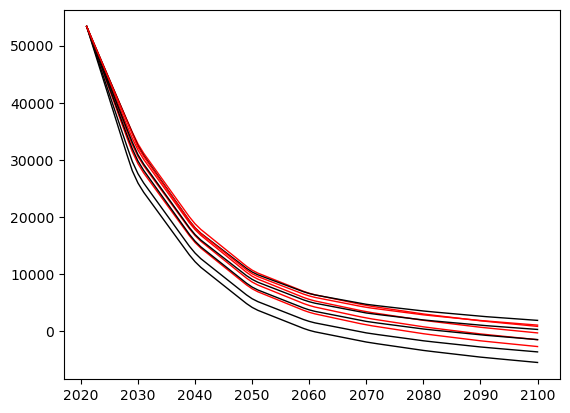

In [5]:
T = 1.6

for i in [0.17, 0.33, 0.5, 0.67, 0.83]:
    plt.plot(xr_dataread_old.Time,
             xr_dataread_old.GHG_globe.sel(Temperature=T, NegEmis=0.5, Risk=0.5, Timing='Immediate', NonCO2red=i), 'k', lw=1)
    plt.plot(xr_dataread_new.Time,
             xr_dataread_new.GHG_globe.sel(Temperature=T, NegEmis=0.5, Risk=0.5, Timing='Immediate', NonCO2red=i), 'r', lw=1)

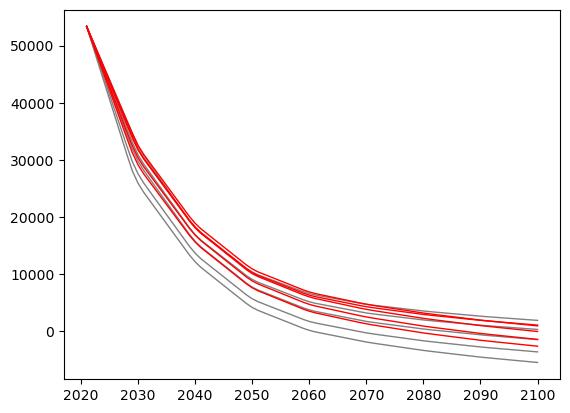

In [11]:
T = 1.6

for i in [0.17, 0.33, 0.5, 0.67, 0.83]:
    plt.plot(xr_dataread_old.Time,
             xr_dataread_old.GHG_globe.sel(Temperature=T, NegEmis=0.5, Risk=0.5, Timing='Immediate', NonCO2red=i), 'grey', lw=1, zorder=-1e9)
    plt.plot(xr_dataread_new.Time,
             xr_dataread_new.GHG_globe.sel(Temperature=T, NegEmis=0.5, Risk=0.5, Timing='Immediate', NonCO2red=i), 'r', lw=1)

C:\Users\dekkerm\AppData\Local\Temp\2\ipykernel_11344\128772528.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


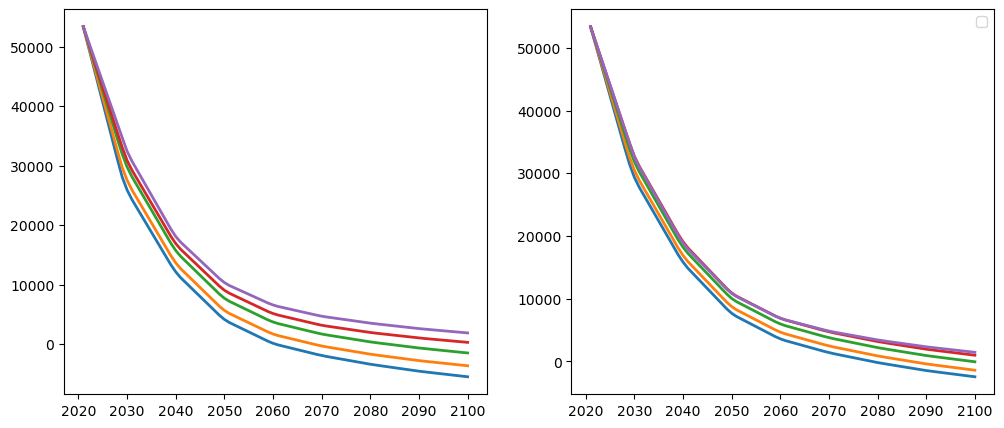

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
T = 1.6
for i in [0.17, 0.33, 0.5, 0.67, 0.83]:
    ax1.plot(xr_dataread_old.Time,
             xr_dataread_old.GHG_globe.sel(Temperature=T, NegEmis=0.5, Risk=0.5, Timing='Immediate', NonCO2red=i), lw=2)
    ax2.plot(xr_dataread_new.Time,
             xr_dataread_new.GHG_globe.sel(Temperature=T, NegEmis=0.5, Risk=0.5, Timing='Immediate', NonCO2red=i), lw=2)
plt.legend()

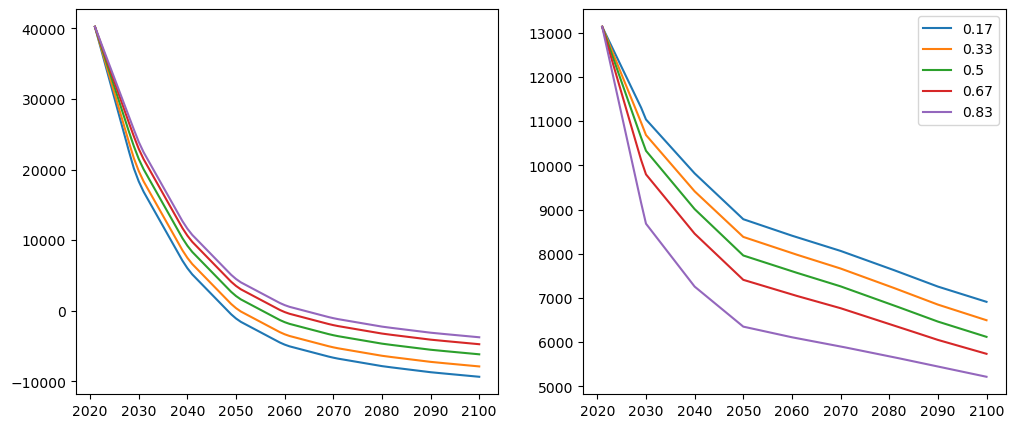

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

T = 1.6
for i in [0.17, 0.33, 0.5, 0.67, 0.83]:
    ax1.plot(xr_dataread_new.Time,
             xr_dataread_new.CO2_globe.sel(Temperature=T, NegEmis=0.5, Risk=0.5, Timing='Immediate', NonCO2red=i), label=i)
    ax2.plot(xr_dataread_new.Time,
             xr_dataread_new.NonCO2_globe.sel(Temperature=T, Risk=0.5, NonCO2red=i, Timing='Immediate'), label=i)
plt.legend()

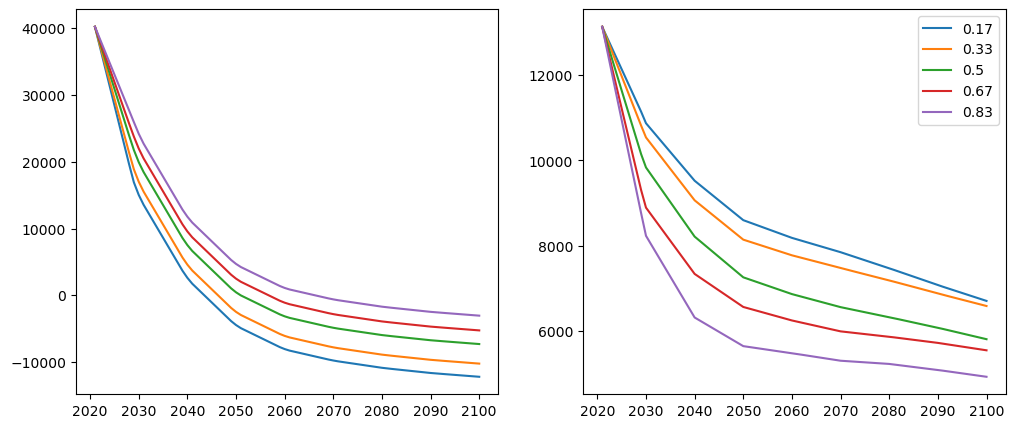

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

T = 1.6
for i in [0.17, 0.33, 0.5, 0.67, 0.83]:
    ax1.plot(xr_dataread_old.Time,
             xr_dataread_old.CO2_globe.sel(Temperature=T, NegEmis=0.5, Risk=0.5, Timing='Immediate', NonCO2red=i), label=i)
    ax2.plot(xr_dataread_old.Time,
             xr_dataread_old.NonCO2_globe.sel(Temperature=T, NonCO2red=i), label=i)
plt.legend()

## Run classes

Data reader class

In [10]:
import class_datareading
reload(class_datareading)
from class_datareading import datareading

datareader = datareading()
datareader.read_general()
# datareader.read_ssps()
# datareader.read_undata()
# datareader.read_hdi()
datareader.read_historicalemis_jones()
datareader.read_ar6()
datareader.relation_budget_nonco2()
datareader.determine_global_nonco2_trajectories()
# datareader.determine_global_budgets()
# datareader.determine_global_co2_trajectories()
# datareader.read_baseline()
# datareader.read_ndc()
# datareader.read_ndc_climateresource()
# datareader.merge_xr()
# datareader.add_country_groups()
# datareader.save()
# datareader.country_specific_datareaders()

# ==================================== #
# DATAREADING class                    #
# startyear:  2021
# ==================================== #
- Reading general data
- Reading historical emissions (jones)
- Read AR6 data
- Get relationship between CO2 budgets and non-co2 reduction in 2050
- Computing global nonco2 trajectories


In [63]:
import class_allocation
reload(class_allocation)
from class_allocation import allocation

allocator = allocation("USA", lulucf='incl', gas='GHG')
allocator.gf()
allocator.pc()
allocator.pcc()
allocator.pcb()
allocator.ecpc()
allocator.ap()
allocator.gdr()
allocator.save()